1.Importing required Libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
import keras 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from sklearn.metrics import accuracy_score

In [5]:
pip install ipywidgets

   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ------------------- -------------------- 1.0/2.2 MB 5.0 MB/s eta 0:00:01
   --------------------------------- ------ 1.8/2.2 MB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 4.6 MB/s  0:00:00

   ------------- -------------------------- 1/3 [jupyterlab_widgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   ---------------------------------------- 3/3 [ipywidgets]

Note: you may need to res

In [9]:
pip install opencv-python


  Using cached numpy-2.2.6-cp312-cp312-win_amd64.whl.metadata (60 kB)
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
    --------------------------------------- 0.8/39.0 MB 4.8 MB/s eta 0:00:08
   - -------------------------------------- 1.6/39.0 MB 4.4 MB/s eta 0:00:09
   -- ------------------------------------- 2.6/39.0 MB 4.7 MB/s eta 0:00:08
   --- ------------------------------------ 3.7/39.0 MB 4.6 MB/s eta 0:00:08
   ---- ----------------------------------- 4.5/39.0 MB 4.6 MB/s eta 0:00:08
   ----- ---------------------------------- 5.5/39.0 MB 4.7 MB/s eta 0:00:08
   ------ --------------------------------- 6.6/39.0 MB 4.7 MB/s eta 0:00:07
   ------- -------------------------------- 7.3/39.0 MB 4.6 MB/s eta 0:00:07
   -------- ------------------------------- 8.4/39.0 MB 4.6 MB/s eta 0:00:07
   --------- ------------------------------ 9.4/39.0 MB 4.6 MB/s eta 0:00:07
   ---------- ----------------------------- 10.5/39.0 MB 4.6 MB/s eta 0:00:07
   ---------

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.6 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.


In [12]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
import os

2. Load Dataset

Here we combine both train and test data into a single train data and then we shuffle it . atlast by doing train test split we take 90% data as training data and remaining 10% as test data

In [19]:
X_train = []
y_train = []
image_size = 150
labels =['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = rf"C:\ML Projects\Notes\100 days of ML code\Brain Tumor CNN\Training\{i}\\"

    for j in tqdm.tqdm(os.listdir(folderPath)):
        img = cv2.imread(folderPath + j)
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)

for i in labels:
    folderPath = rf"C:\ML Projects\Notes\100 days of ML code\Brain Tumor CNN\Testing\{i}\\"

    for j in tqdm.tqdm(os.listdir(folderPath)):
        img = cv2.imread(folderPath + j)
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)


100%|██████████| 74/74 [00:00<00:00, 312.84it/s]


In [20]:
X_train.shape, y_train.shape

((3264, 150, 150, 3), (3264,))

3. Preprocessing

Here we normalise pixel values [0,255] >>> [0,1]

In [21]:
X_train, y_train = shuffle(X_train, y_train, random_state=101)
X_train = X_train / 255.0

4. Train/Test split

In [22]:
X_train , X_test , y_train , y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=101)

5. Encoding Labels

covert string labels to numeric values (0,1,2,3)

In [ ]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

6. Building CNN Model

Convolutional Neural Network(CNN)

In [24]:
model = Sequential()
model.add(Conv2D(32,(3, 3), activation='relu', input_shape=(150,150,3)))
model.add(Conv2D(64,(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3, 3), activation='relu'))
model.add(Conv2D(64,(3, 3), activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3, 3), activation='relu'))
model.add(Conv2D(128,(3, 3), activation='relu'))
model.add(Conv2D(128,(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3, 3), activation='relu'))
model.add(Conv2D(256,(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

c:\Users\janar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 69, 69, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 69, 69, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,447,044 (16.96 MB)

 Trainable params: 4,447,044 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

7. compile and train

In [26]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
history = model.fit(X_train, y_train, epochs=25, validation_split=0.1)

Epoch 1/25
83/83 ━━━━━━━━━━━━━━━━━━━━ 71s 808ms/step - accuracy: 0.2644 - loss: 1.3724 - val_accuracy: 0.2891 - val_loss: 1.3648
Epoch 2/25
83/83 ━━━━━━━━━━━━━━━━━━━━ 69s 830ms/step - accuracy: 0.2859 - loss: 1.3534 - val_accuracy: 0.3776 - val_loss: 1.2525
Epoch 3/25
83/83 ━━━━━━━━━━━━━━━━━━━━ 69s 829ms/step - accuracy: 0.3853 - loss: 1.2828 - val_accuracy: 0.3401 - val_loss: 1.3507
Epoch 4/25
83/83 ━━━━━━━━━━━━━━━━━━━━ 67s 804ms/step - accuracy: 0.4412 - loss: 1.1775 - val_accuracy: 0.5952 - val_loss: 0.9781
Epoch 5/25
83/83 ━━━━━━━━━━━━━━━━━━━━ 68s 812ms/step - accuracy: 0.6419 - loss: 0.8947 - val_accuracy: 0.6463 - val_loss: 0.8664
Epoch 6/25
83/83 ━━━━━━━━━━━━━━━━━━━━ 68s 819ms/step - accuracy: 0.7295 - loss: 0.7007 - val_accuracy: 0.7041 - val_loss: 0.7295
Epoch 7/25
83/83 ━━━━━━━━━━━━━━━━━━━━ 67s 802ms/step - accuracy: 0.7836 - loss: 0.5867 - val_accuracy: 0.7245 - val_loss: 0.7305
Epoch 8/25
83/83 ━━━━━━━━━━━━━━━━━━━━ 69s 829ms/step - accuracy: 0.7990 - loss: 0.5060 - val_accu

In [28]:
# Evaluate on held-out test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 142ms/step - accuracy: 0.8014 - loss: 0.6479
Test Accuracy: 0.8135, Test Loss: 0.6188


8. plot accuracy and loss

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

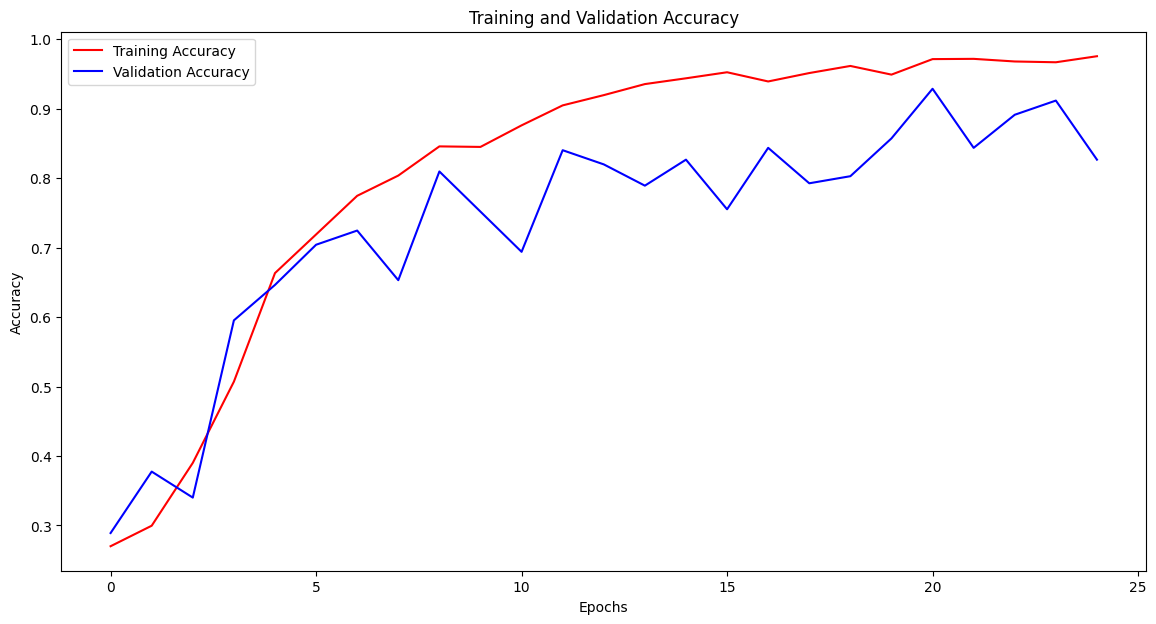

In [30]:
model.save('brain_tumor_classification.h5')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(acc))
fig = plt.figure(figsize=(14, 7))
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'upper left')
plt.show()

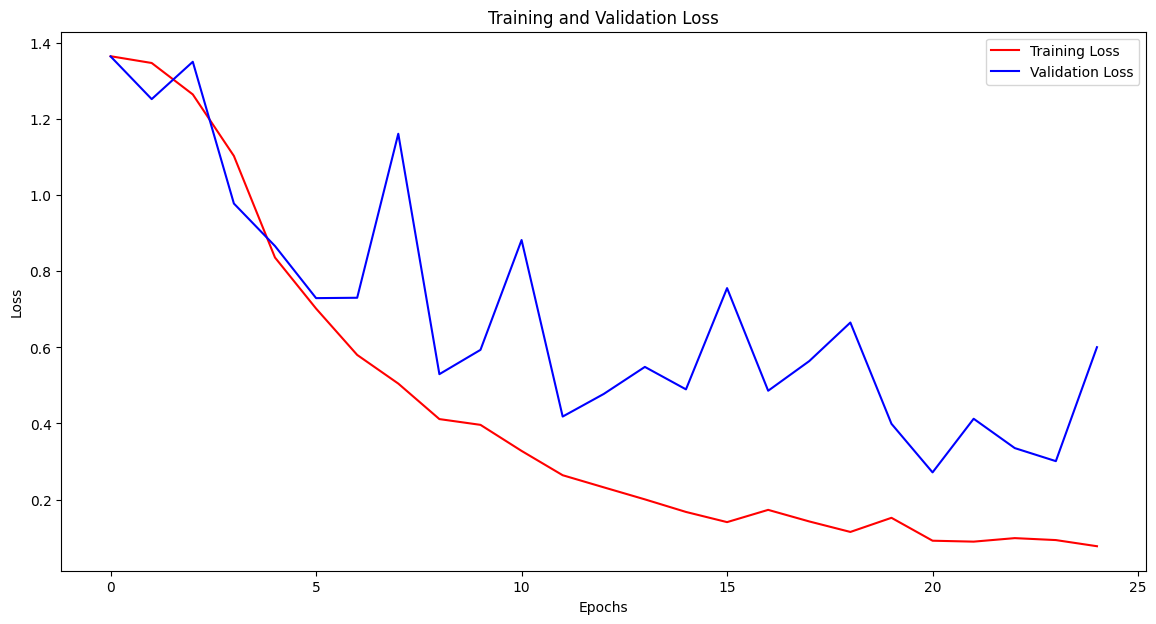

In [32]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))


fig = plt.figure(figsize=(14, 7))
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'upper right')
plt.show()

9. Prediction on a single image

In [51]:
img = cv2.imread(r"C:\ML Projects\Notes\100 days of ML code\Brain Tumor CNN\Training\meningioma_tumor\m (138).jpg")
img = cv2.resize(img, (150, 150))
img_array = np.array(img)
img_array = img_array.reshape(1, 150, 150, 3)
img_array.shape

(1, 150, 150, 3)

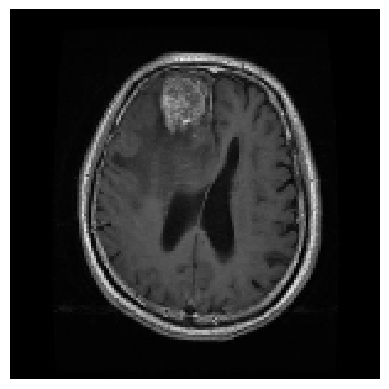

In [52]:
from tensorflow.keras.preprocessing import image
img = image.load_img(r"C:\ML Projects\Notes\100 days of ML code\Brain Tumor CNN\Training\meningioma_tumor\m (138).jpg", target_size=(150, 150))

plt.imshow(img,interpolation='nearest')
plt.axis('off')
plt.show()

In [53]:
a = model.predict(img_array)
indices = a.argmax()
print("Predicted class index:", indices)
print("Predicted tumor type:", labels[indices])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted class index: 1
Predicted tumor type: meningioma_tumor
